## Importación de librerias

In [ ]:

# Tratamiento de datos
import pandas as pd 
pd.set_option('display.max_columns', None)
import numpy as np 

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns


##  Carga de datos

In [70]:
df_bank = pd.read_csv('../EDA con Python/bank-additional.csv', index_col=0)

## Analisis preliminar

In [71]:
df_bank.head()

,age,job,marital,education,default,housing,loan,contact,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,date,latitude,longitude,id_
0,NaN,housemaid,MARRIED,basic.4y,0.0,0.0,0.0,telephone,261,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,2-agosto-2019,41.495,-71.233,089b39d8-e4d0-461b-87d4-814d71e0e079
1,57.0,services,MARRIED,high.school,NaN,0.0,0.0,telephone,149,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,14-septiembre-2016,34.601,-83.923,e9d37224-cb6f-4942-98d7-46672963d097
2,37.0,services,MARRIED,high.school,0.0,1.0,0.0,telephone,226,1,999,0,NONEXISTENT,1.1,"93,994","-36,4","4,857",5191,no,15-febrero-2019,34.939,-94.847,3f9f49b5-e410-4948-bf6e-f9244f04918b
3,40.0,admin.,MARRIED,basic.6y,0.0,0.0,0.0,telephone,151,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-noviembre-2015,49.041,-70.308,9991fafb-4447-451a-8be2-b0df6098d13e
4,56.0,services,MARRIED,high.school,0.0,0.0,1.0,telephone,307,1,999,0,NONEXISTENT,1.1,"93,994","-36,4",NaN,5191,no,29-enero-2017,38.033,-104.463,eca60b76-70b6-4077-80ba-bc52e8ebb0eb


In [73]:
df_bank.info()

<class 'pandas.core.frame.DataFrame'>
Index: 43000 entries, 0 to 27570
Data columns (total 23 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             37880 non-null  float64
 1   job             42655 non-null  object 
 2   marital         42915 non-null  object 
 3   education       41193 non-null  object 
 4   default         34019 non-null  float64
 5   housing         41974 non-null  float64
 6   loan            41974 non-null  float64
 7   contact         43000 non-null  object 
 8   duration        43000 non-null  int64  
 9   campaign        43000 non-null  int64  
 10  pdays           43000 non-null  int64  
 11  previous        43000 non-null  int64  
 12  poutcome        43000 non-null  object 
 13  emp.var.rate    43000 non-null  float64
 14  cons.price.idx  42529 non-null  object 
 15  cons.conf.idx   43000 non-null  object 
 16  euribor3m       33744 non-null  object 
 17  nr.employed     43000 non-null  obje

## Columnas del Dataset

......

## Valores duplicados

In [74]:
df_bank.duplicated().sum()

np.int64(0)

## Valores nulos

In [75]:
nulos = df_bank.isna().sum().sort_values(ascending=False)

nulos[nulos > 0]


euribor3m         9256
default           8981
age               5120
education         1807
housing           1026
loan              1026
cons.price.idx     471
job                345
date               248
marital             85
dtype: int64

In [76]:
nulos_porcent = df_bank.isna().mean()*100
nulos_porcent[nulos_porcent > 0].round(2)

age               11.91
job                0.80
marital            0.20
education          4.20
default           20.89
housing            2.39
loan               2.39
cons.price.idx     1.10
euribor3m         21.53
date               0.58
dtype: float64

Vemos que tenemos tres columnas donde el valor de nulos es significativo ...

## Variables numéricas

In [77]:
columnas_num = df_bank.select_dtypes(include='number').columns

columnas_num

Index(['age', 'default', 'housing', 'loan', 'duration', 'campaign', 'pdays',
       'previous', 'emp.var.rate', 'latitude', 'longitude'],
      dtype='object')

In [78]:
df_bank.describe(include='number').T.round(2)

,count,mean,std,min,25%,50%,75%,max
age,37880.0,39.98,10.44,17.0,32.00,38.00,47.00,98.00
default,34019.0,0.00,0.01,0.0,0.00,0.00,0.00,1.00
housing,41974.0,0.54,0.50,0.0,0.00,1.00,1.00,1.00
loan,41974.0,0.16,0.36,0.0,0.00,0.00,0.00,1.00
duration,43000.0,257.74,258.67,0.0,102.00,179.00,319.00,4918.00
campaign,43000.0,2.57,2.77,1.0,1.00,2.00,3.00,56.00
pdays,43000.0,962.33,187.26,0.0,999.00,999.00,999.00,999.00
previous,43000.0,0.17,0.50,0.0,0.00,0.00,0.00,7.00
emp.var.rate,43000.0,0.08,1.57,-3.4,-1.80,1.10,1.40,1.40
latitude,43000.0,36.86,7.23,24.4,30.61,36.76,43.11,49.38


Observaciones rápidas

### Histograma


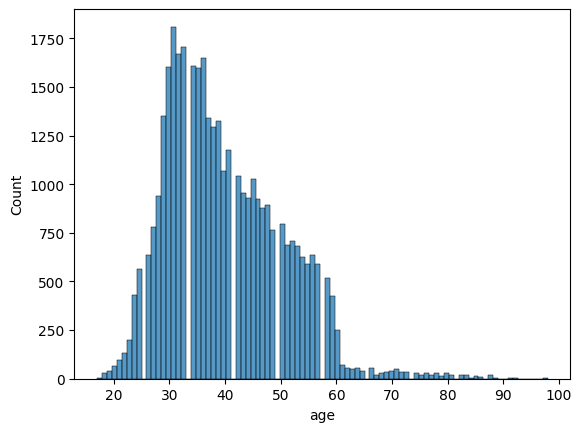

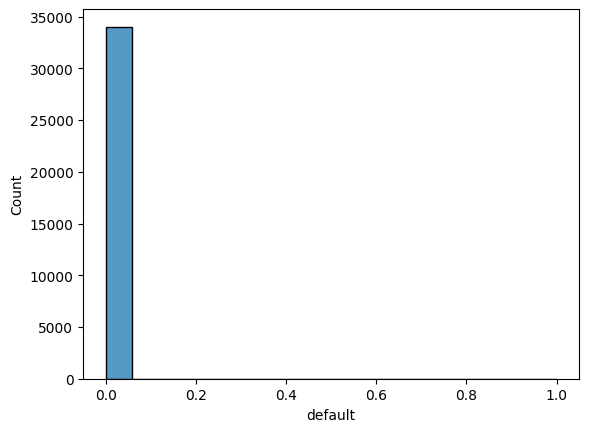

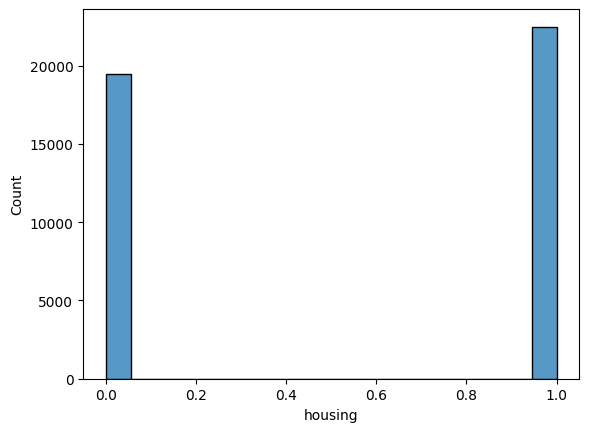

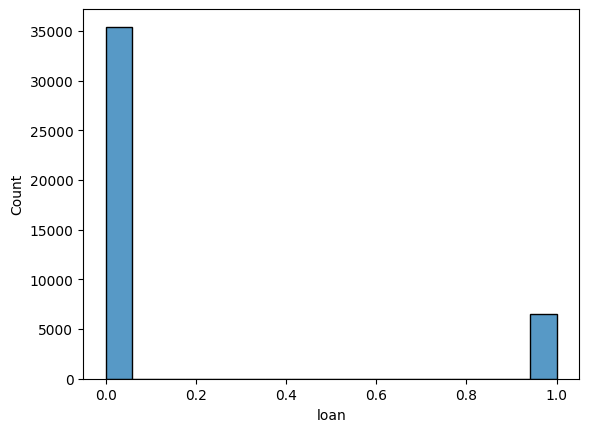

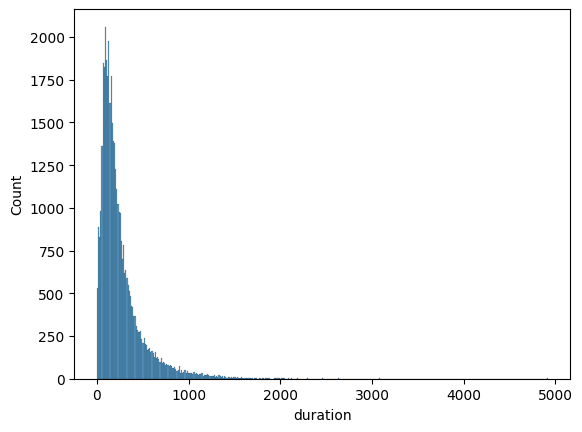

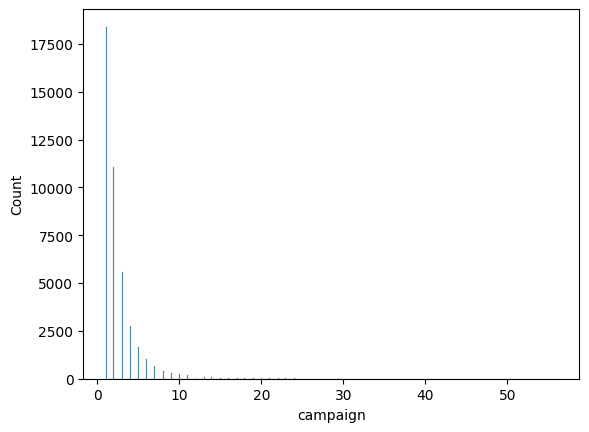

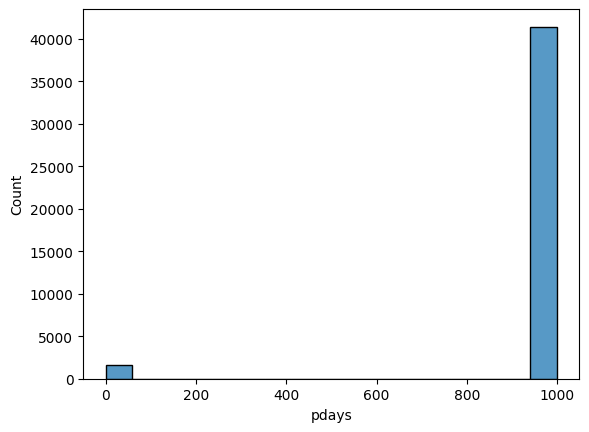

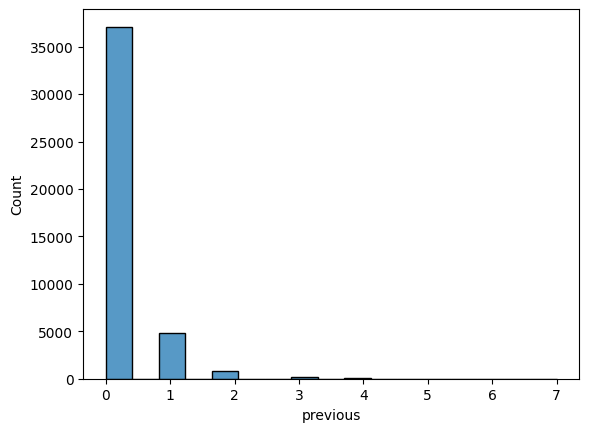

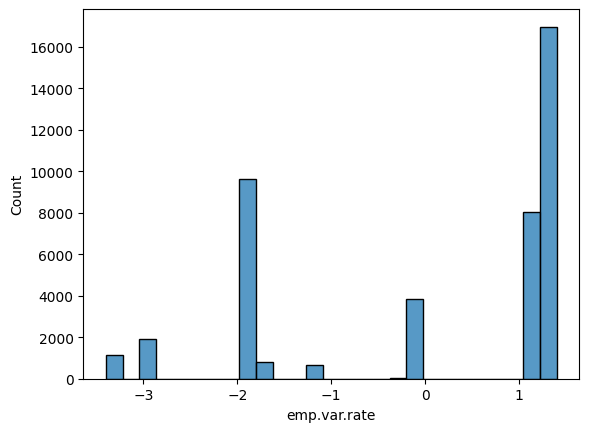

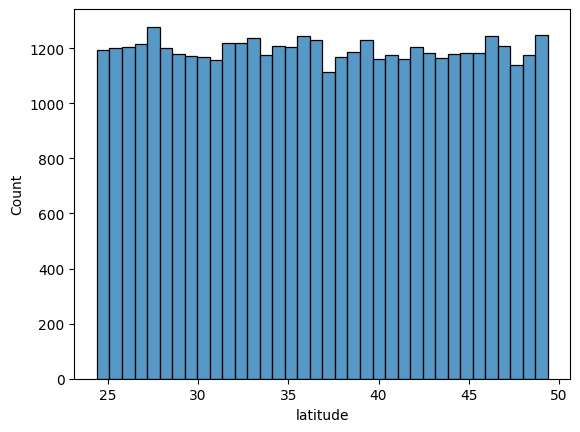

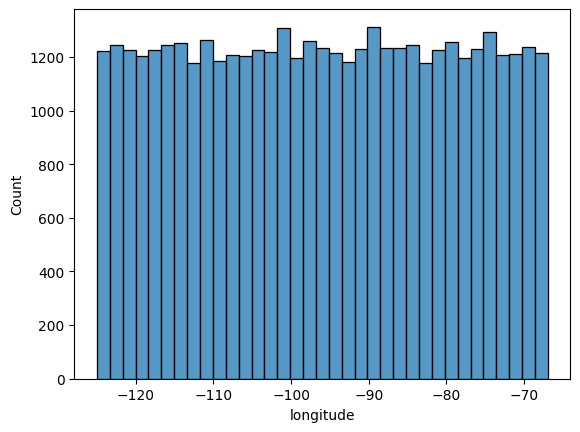

In [83]:
for col in columnas_num:

    plt.Figure()
    sns.histplot(df_bank[col])
    plt.show()

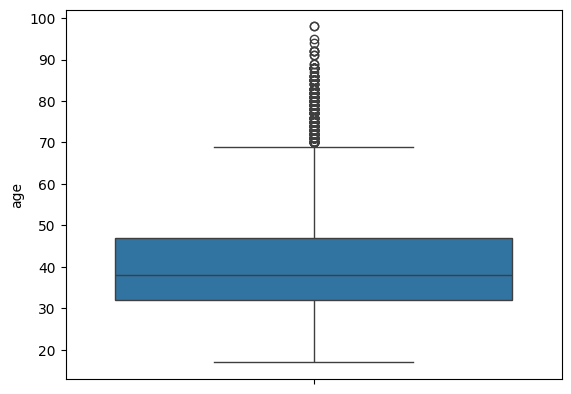

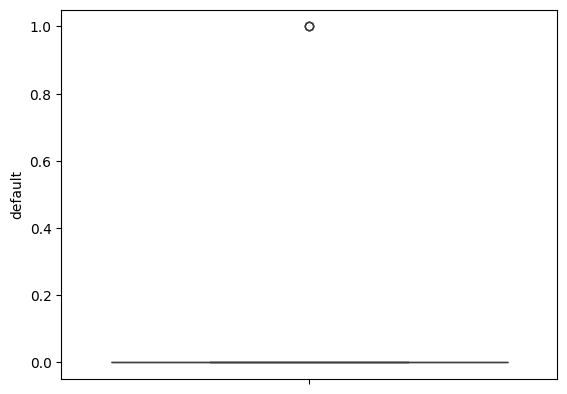

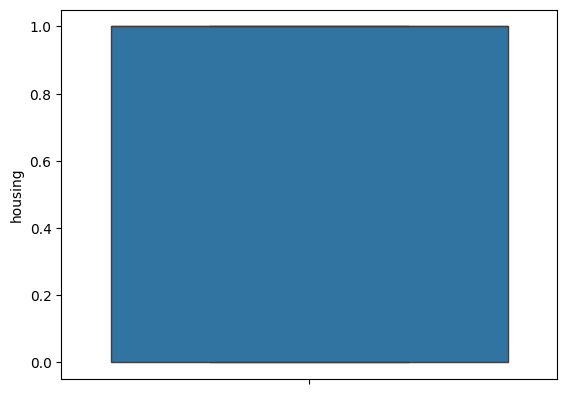

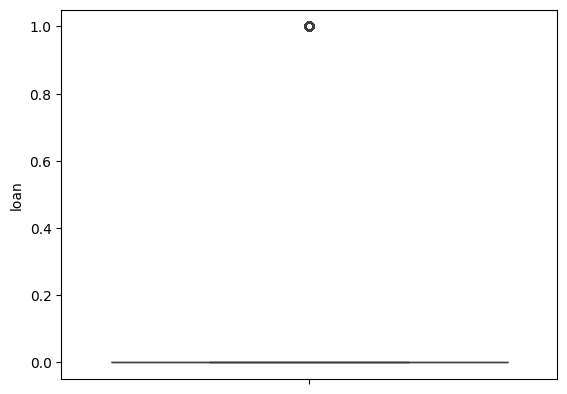

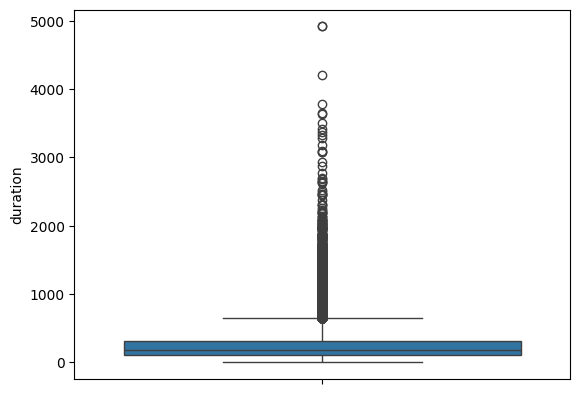

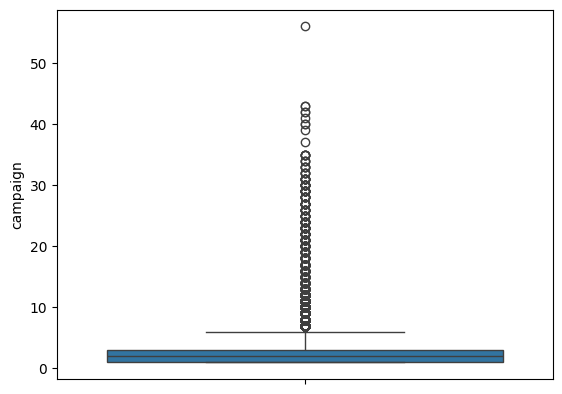

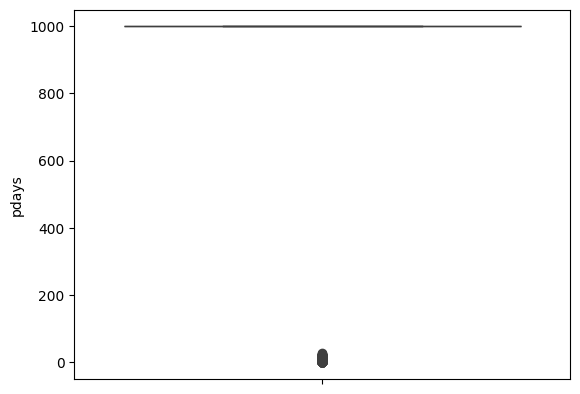

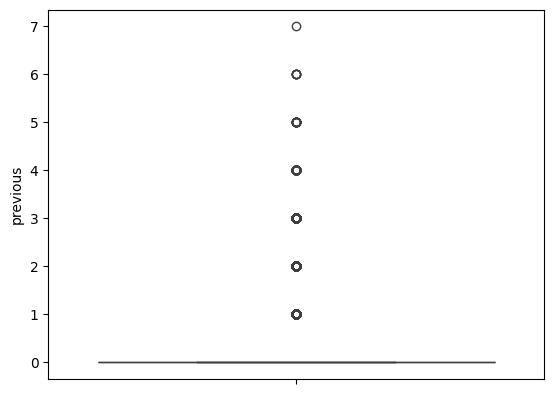

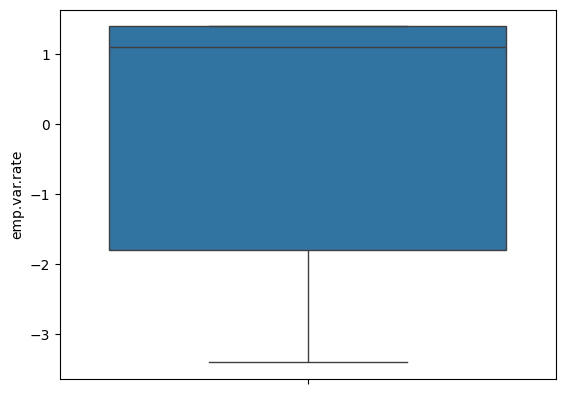

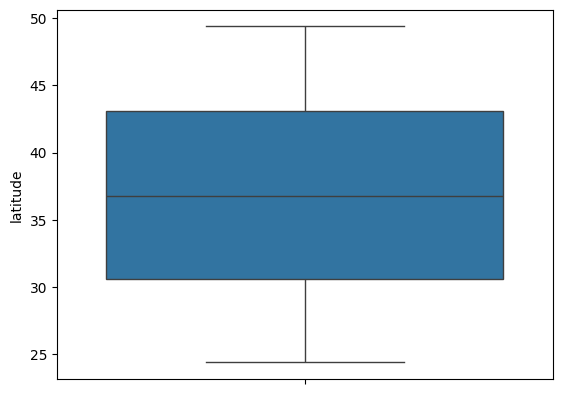

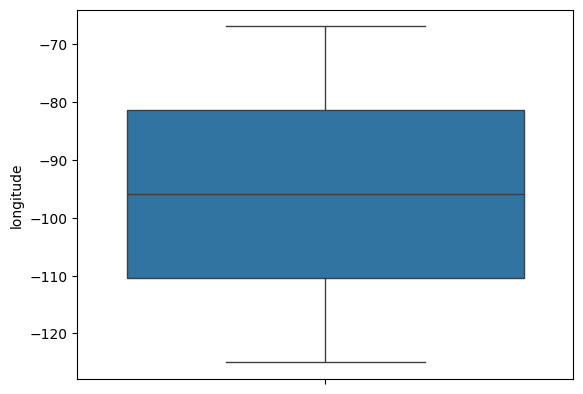

In [92]:
for col in columnas_num:

    plt.Figure()
    sns.boxplot(df_bank[col])
    plt.show()

## Columnas categóricas

In [95]:
df_bank.describe(include=['category', 'object']).T

,count,unique,top,freq
job,42655,11,admin.,10873
marital,42915,3,MARRIED,25999
education,41193,7,university.degree,12722
contact,43000,2,cellular,27396
poutcome,43000,3,NONEXISTENT,37103
cons.price.idx,42529,26,"93,994",7938
cons.conf.idx,43000,26,"-36,4",8020
euribor3m,33744,309,"4,857",2287
nr.employed,43000,11,"5228,1",16980
y,43000,2,no,38156


In [97]:
columnas_cat = df_bank.select_dtypes(include=['category', 'object']).columns

columnas_cat

Index(['job', 'marital', 'education', 'contact', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y', 'date', 'id_'],
      dtype='object')

In [114]:
for col in columnas_cat:

    print(f"La columna {col} tiene un total de {df_bank[col].nunique()} valores distintos")

    df_bank[col].value_counts()
    display(df_bank[col].value_counts(dropna=False).head(10))

La columna job tiene un total de 11 valores distintos


job
admin.           10873
blue-collar       9654
technician        7026
services          4162
management        3050
retired           1790
entrepreneur      1522
self-employed     1489
housemaid         1123
unemployed        1063
Name: count, dtype: int64

La columna marital tiene un total de 3 valores distintos


marital
MARRIED     25999
SINGLE      12105
DIVORCED     4811
NaN            85
Name: count, dtype: int64

La columna education tiene un total de 7 valores distintos


education
university.degree      12722
high.school             9925
basic.9y                6309
professional.course     5477
basic.4y                4356
basic.6y                2386
NaN                     1807
illiterate                18
Name: count, dtype: int64

La columna contact tiene un total de 2 valores distintos


contact
cellular     27396
telephone    15604
Name: count, dtype: int64

La columna poutcome tiene un total de 3 valores distintos


poutcome
NONEXISTENT    37103
FAILURE         4461
SUCCESS         1436
Name: count, dtype: int64

La columna cons.price.idx tiene un total de 26 valores distintos


cons.price.idx
93,994    7938
93,918    6937
92,893    5985
93,444    5349
94,465    4522
93,2      3731
93,075    2552
92,201     803
92,963     742
NaN        471
Name: count, dtype: int64

La columna cons.conf.idx tiene un total de 26 valores distintos


cons.conf.idx
-36,4    8020
-42,7    7004
-46,2    6057
-36,1    5408
-41,8    4568
-42      3782
-47,1    2581
-31,4     815
-40,8     748
-26,9     477
Name: count, dtype: int64

La columna euribor3m tiene un total de 309 valores distintos


euribor3m
NaN      9256
4,857    2287
4,962    2124
4,963    2019
4,961    1594
4,964     964
4,856     961
1,405     954
4,864     871
4,965     866
Name: count, dtype: int64

La columna nr.employed tiene un total de 11 valores distintos


nr.employed
5228,1    16980
5099,1     8937
5191       8020
5195,8     3830
5076,2     1748
5017,5     1133
4991,6      812
5008,7      683
4963,6      665
5023,5      181
Name: count, dtype: int64

La columna y tiene un total de 2 valores distintos


y
no     38156
yes     4844
Name: count, dtype: int64

La columna date tiene un total de 1825 valores distintos


date
NaN                   248
28-febrero-2018        95
28-febrero-2016        94
28-febrero-2015        92
28-febrero-2017        89
28-febrero-2019        85
30-abril-2018          58
30-septiembre-2017     56
30-noviembre-2017      55
30-junio-2015          55
Name: count, dtype: int64

La columna id_ tiene un total de 43000 valores distintos


id_
993bbbd6-4dbc-4a40-a408-f91f8462bee6    1
089b39d8-e4d0-461b-87d4-814d71e0e079    1
e9d37224-cb6f-4942-98d7-46672963d097    1
3f9f49b5-e410-4948-bf6e-f9244f04918b    1
9991fafb-4447-451a-8be2-b0df6098d13e    1
eca60b76-70b6-4077-80ba-bc52e8ebb0eb    1
d63ede72-0b6d-45b1-8872-385ac6897f65    1
5e3483e5-236d-437d-8351-541f9d09b9dd    1
9ebb7576-92de-4949-b2e3-e56890740112    1
85e7d06a-50c4-4b82-bcb7-45525c7f7f6a    1
Name: count, dtype: int64

### Countplot


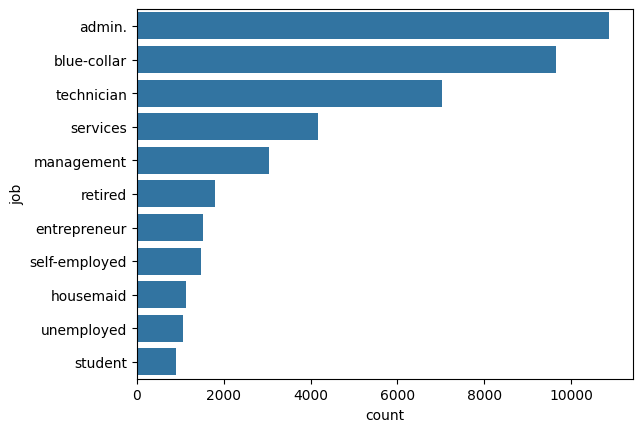

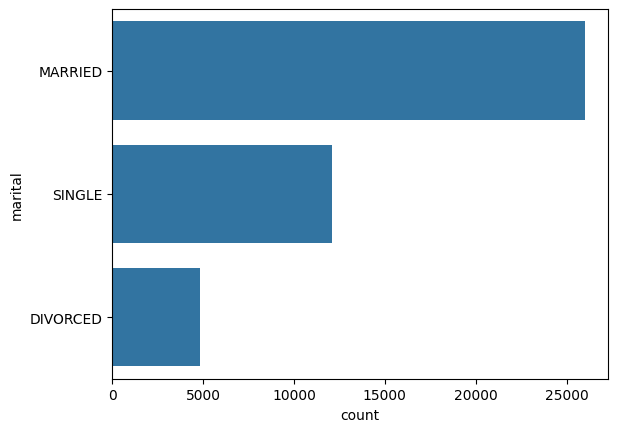

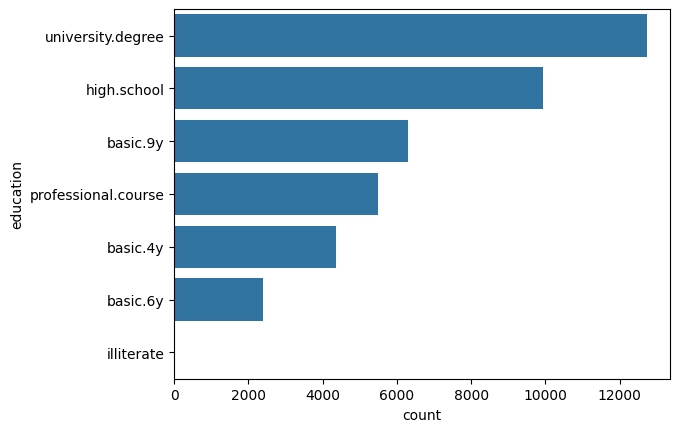

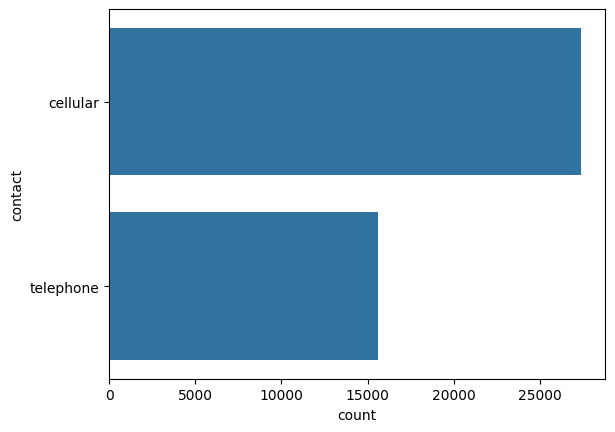

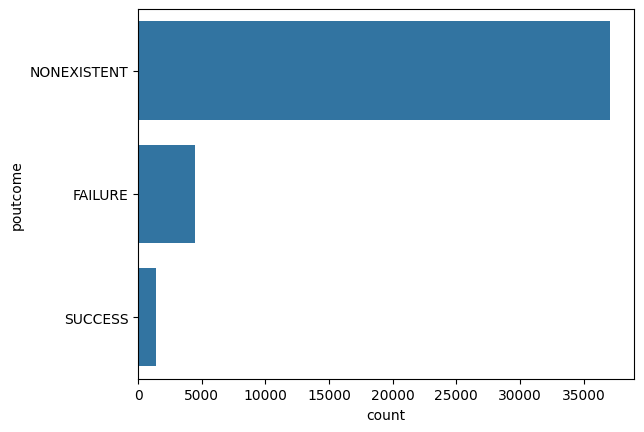

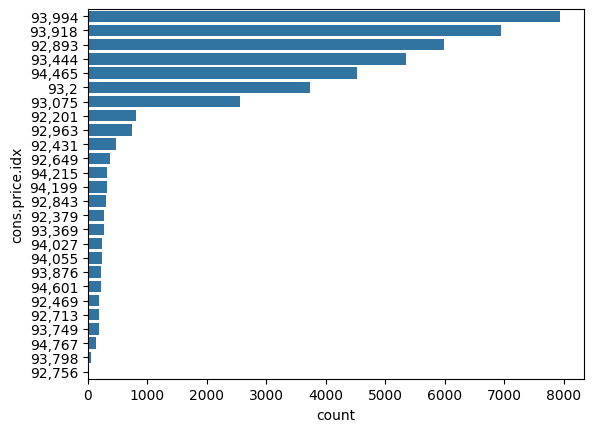

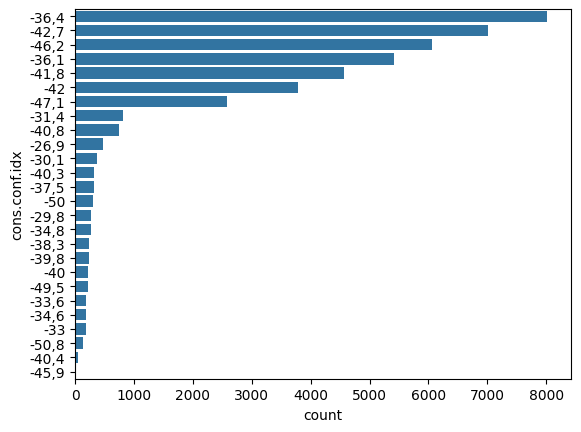

La columnda euribor3m tiene demasiadas categorias:309


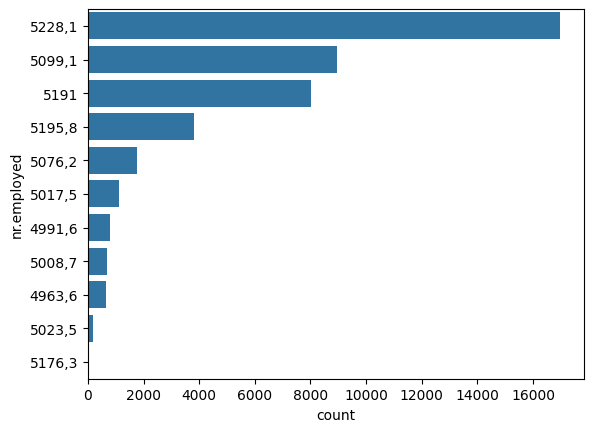

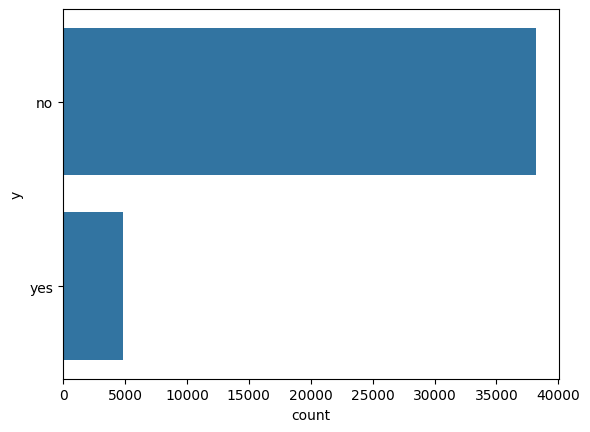

La columnda date tiene demasiadas categorias:1825
La columnda id_ tiene demasiadas categorias:43000


In [148]:
for col in columnas_cat:

    if df_bank[col].nunique() > 100:
        print(f"La columnda {col} tiene demasiadas categorias:{df_bank[col].nunique()}")
        continue
    plt.Figure(figsize=(10,6))
    sns.countplot(df_bank[col], order= df_bank[col].value_counts().index)
    plt.show()

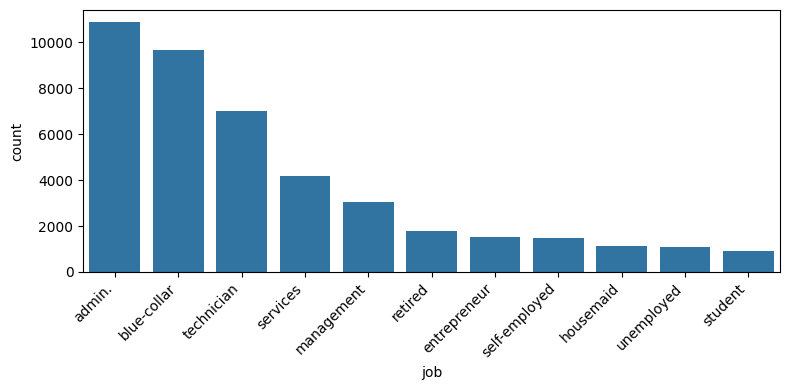

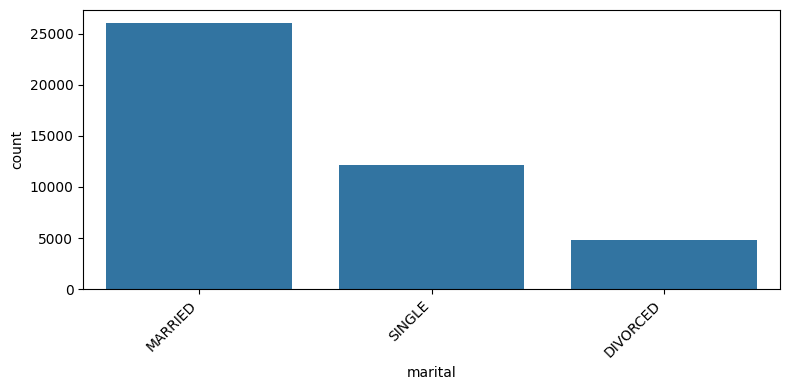

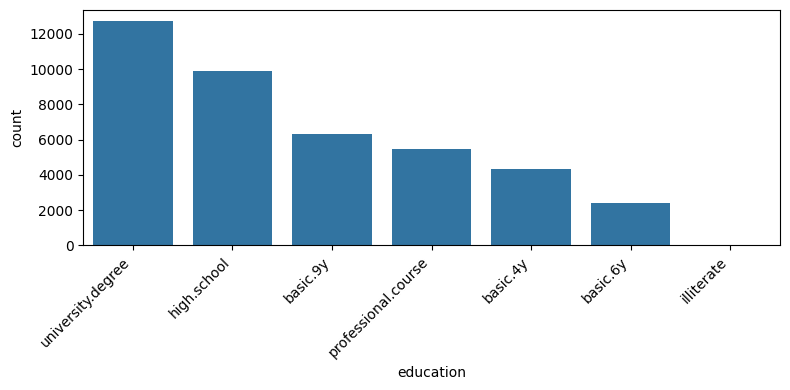

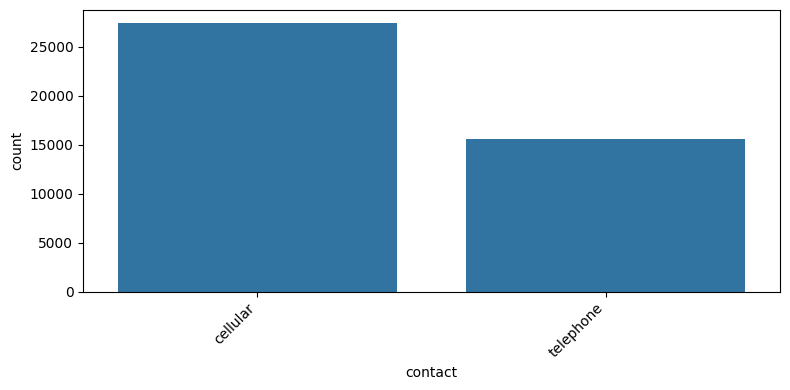

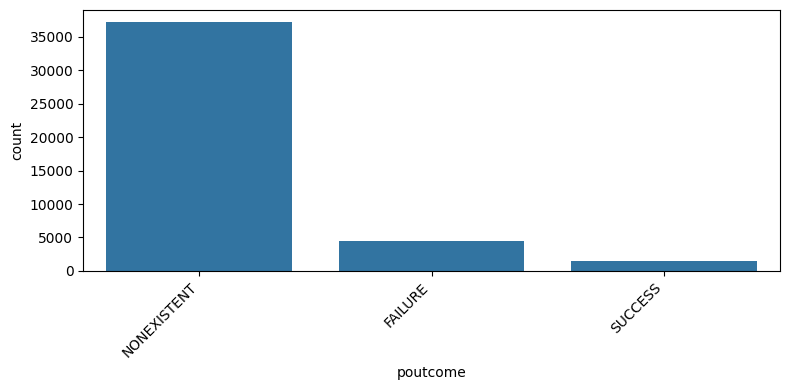

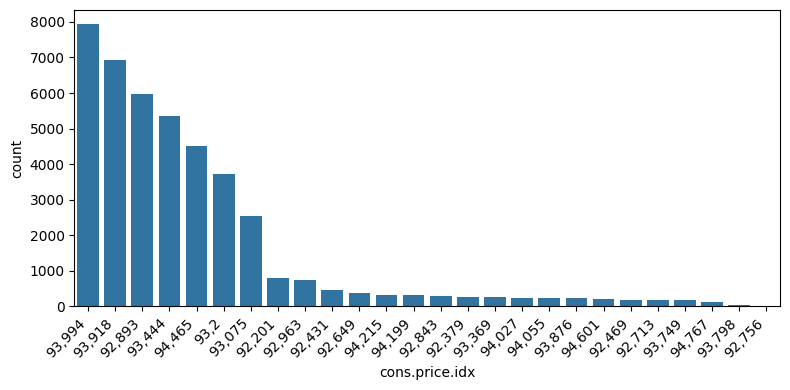

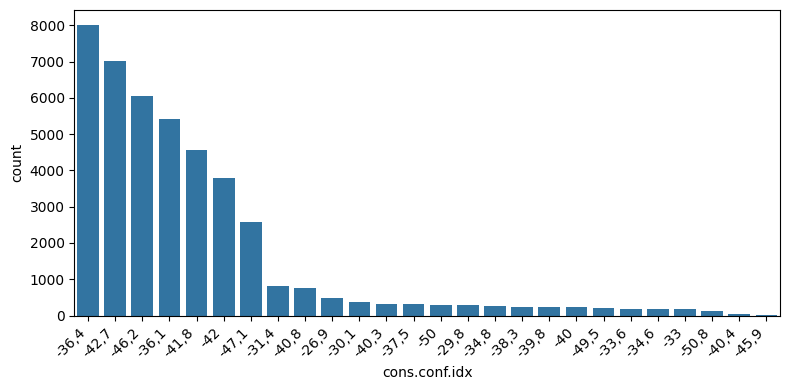

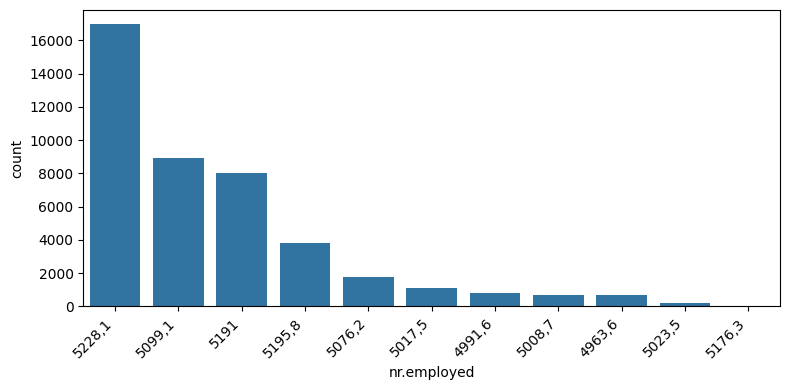

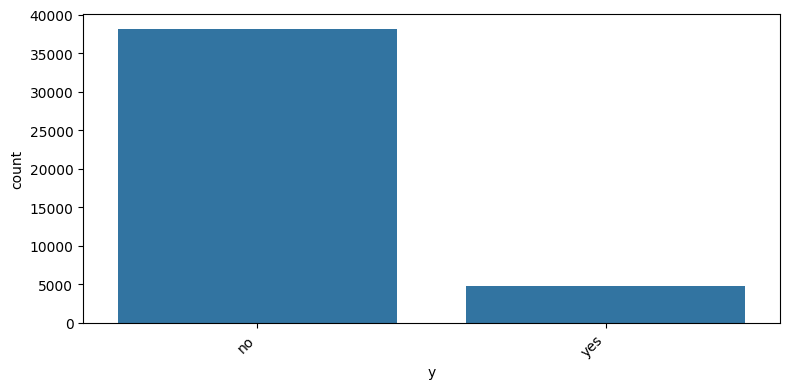

In [131]:
# 0) (opcional, pero recomendable si hubo merges/filtrados previos)
df_bank = df_bank.reset_index(drop=True)

for col in columnas_cat:
    if df_bank[col].nunique() > 100:
        continue

    plt.figure(figsize=(8, 4))  # <-- minúsculas
    sns.countplot(
        data=df_bank,
        x=col,
        order=df_bank[col].value_counts().index  # barras ordenadas
    )
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
